In [203]:
import pandas as pd

In [204]:
import numpy as np

In [205]:
from sklearn.model_selection import cross_val_score

In [206]:
from sklearn.pipeline import Pipeline

In [207]:
from sklearn.feature_extraction.text import CountVectorizer

In [208]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [209]:
from sklearn.linear_model import LogisticRegression

In [210]:
from sklearn.svm import LinearSVC

In [211]:
from sklearn.linear_model import SGDClassifier

In [212]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [213]:
data = pd.read_csv('rated_reviews.csv', encoding='utf-8', index_col=0)

In [214]:
data.head()

,text,rate
0,"Красивый, отличный экран, богатый функционал К...",5
1,Самый большой плюс алюминиевый корпус. Нет воз...,4
2,Удобен в эксплуатации. Почти все заводские пр...,4
3,крутой телефон он наверно новый.:) у меня нету...,5
4,Роскошная камера. Невероятный дисплей. Прекрас...,5


(array([ 266.,    0.,  191.,    0.,    0.,  399.,    0.,  905.,    0.,
        4249.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

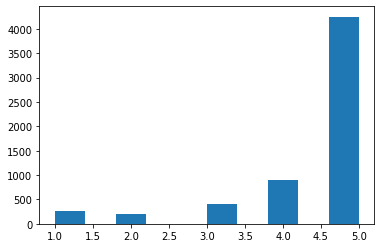

In [215]:
plt.hist(data.rate)

In [216]:
X_train = np.array(data.text)

In [217]:
y_train = np.array(data.rate)

In [218]:
with open('test.csv', 'r', encoding='utf-8') as file:
    X_test = np.array( [i[8:-9] for i in file.read().split('\n\n')] )

In [219]:
data_test = pd.read_csv('y_test.csv', encoding='utf-8')

In [220]:
data_test.head()

,value
0,neg
1,pos
2,neg
3,neg
4,pos


In [221]:
y_test = np.array(data_test.value)

In [222]:
X_test = X_test[:-1]

In [223]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6010,), (6010,), (100,), (100,))

In [224]:
estimators = []

In [ ]:
for i in [CountVectorizer, TfidfVectorizer]:
    for j in [LogisticRegression, SGDClassifier, LinearSVC]:
        pipe = Pipeline([ ('vect', i()), ('class', j()) ])
        estimators.append(( str(i), str(j), cross_val_score(pipe, X_train, y_train).mean() ))

In [226]:
for i in estimators:
    print(i)

("<class 'sklearn.feature_extraction.text.CountVectorizer'>", "<class 'sklearn.linear_model.logistic.LogisticRegression'>", 0.7169693500545161)
("<class 'sklearn.feature_extraction.text.CountVectorizer'>", "<class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'>", 0.6966737686552168)
("<class 'sklearn.feature_extraction.text.CountVectorizer'>", "<class 'sklearn.svm.classes.LinearSVC'>", 0.694508600075998)
("<class 'sklearn.feature_extraction.text.TfidfVectorizer'>", "<class 'sklearn.linear_model.logistic.LogisticRegression'>", 0.7101509819701525)
("<class 'sklearn.feature_extraction.text.TfidfVectorizer'>", "<class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'>", 0.7221301088322246)
("<class 'sklearn.feature_extraction.text.TfidfVectorizer'>", "<class 'sklearn.svm.classes.LinearSVC'>", 0.7241271997686405)


In [227]:
vectorizer = TfidfVectorizer().fit(X_train)

In [228]:
X_train_vec = vectorizer.transform(X_train)

In [229]:
classifier = SGDClassifier(class_weight='balanced').fit(X_train_vec, y_train)

In [230]:
X_test_vec = vectorizer.transform(X_test)

In [231]:
y_pred = classifier.predict(X_test_vec)

In [232]:
dictionary = {1: 'neg', 2: 'neg', 3: 'neg', 4: 'pos', 5: 'pos'}

In [233]:
pd.DataFrame({ 'Id': list(range(100)), 'y': [dictionary[i] for i in y_pred] }).to_csv('submission.csv', encoding='utf-8', index=None)